In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from io import BytesIO
from keras.models import Sequential
from keras.layers import Conv1D, Dense,Dropout,Activation,MaxPooling1D,Flatten
from keras.regularizers import L1L2
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams

In [36]:
def create_lookBack(data,look_back = 3):
  val_x = []
  val_y = []
  for i in range(len(data)-look_back-1):
    val_x.append(data[i:(i+look_back),0])
    val_y.append(data[i+look_back,0])
  return np.array(val_x),np.array(val_y)  

In [37]:
def train_test_split(percent,data):
  split = int(percent*len(data))
  train = data[:split]
  test = data[split:]
  print(len(train),len(test),data.shape)
  return train,test 

In [38]:
def one_hot_encoding(data,encoding):
  label_data = []
  for value in data:
    one_hot = [0 for _ in range(encoding)]
    one_hot[int(value*10)] = 1
    label_data.append(one_hot)
  return np.array(label_data)  

In [39]:
def load_data(df):
  data = df['Num'].values
  data = data[::-1]
  data = np.reshape(data,(data.shape[0],1))
  data = data/10
  return data

In [62]:
def plot_results(actual_data,predicted_data,till):
  compare_plot = [(i,j) for i,j in zip(actual_data[0][:till],predicted_data[:till])]
  plt.plot(compare_plot)
  plt.figure(figsize=(20,10))
  plt.show()

In [40]:
uploaded = files.upload()

Saving bonum.csv to bonum (1).csv


In [41]:
df = pd.read_csv(BytesIO(uploaded['bonum.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  5090 non-null   int64
 1   Price   5090 non-null   int64
 2   Num     5090 non-null   int64
dtypes: int64(3)
memory usage: 119.4 KB


In [82]:
data = load_data(df)

In [83]:
train,test = train_test_split(0.85,data)

4326 764 (5090, 1)


In [84]:
look_back = 8
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)
train_x = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))

In [85]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [86]:
model.fit(train_x, train_y, epochs=1000,batch_size=1024, verbose=2)

Epoch 1/1000
5/5 - 0s - loss: 0.1997
Epoch 2/1000
5/5 - 0s - loss: 0.1018
Epoch 3/1000
5/5 - 0s - loss: 0.1102
Epoch 4/1000
5/5 - 0s - loss: 0.0918
Epoch 5/1000
5/5 - 0s - loss: 0.0944
Epoch 6/1000
5/5 - 0s - loss: 0.0943
Epoch 7/1000
5/5 - 0s - loss: 0.0926
Epoch 8/1000
5/5 - 0s - loss: 0.0919
Epoch 9/1000
5/5 - 0s - loss: 0.0914
Epoch 10/1000
5/5 - 0s - loss: 0.0899
Epoch 11/1000
5/5 - 0s - loss: 0.0912
Epoch 12/1000
5/5 - 0s - loss: 0.0911
Epoch 13/1000
5/5 - 0s - loss: 0.0904
Epoch 14/1000
5/5 - 0s - loss: 0.0897
Epoch 15/1000
5/5 - 0s - loss: 0.0897
Epoch 16/1000
5/5 - 0s - loss: 0.0892
Epoch 17/1000
5/5 - 0s - loss: 0.0896
Epoch 18/1000
5/5 - 0s - loss: 0.0891
Epoch 19/1000
5/5 - 0s - loss: 0.0880
Epoch 20/1000
5/5 - 0s - loss: 0.0884
Epoch 21/1000
5/5 - 0s - loss: 0.0887
Epoch 22/1000
5/5 - 0s - loss: 0.0884
Epoch 23/1000
5/5 - 0s - loss: 0.0883
Epoch 24/1000
5/5 - 0s - loss: 0.0875
Epoch 25/1000
5/5 - 0s - loss: 0.0871
Epoch 26/1000
5/5 - 0s - loss: 0.0873
Epoch 27/1000
5/5 - 0

In [87]:
trainPredict = model.predict(train_x, verbose=2)
testPredict = model.predict(test_x, verbose=2)

135/135 - 0s
24/24 - 0s


In [88]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [89]:
import math
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],1))
testPredict = np.reshape(testPredict,(testPredict.shape[0],1))
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.23 RMSE
Test Score: 0.27 RMSE


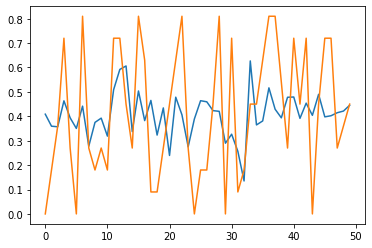

<Figure size 1440x720 with 0 Axes>

In [90]:
train_plot = [(i,j) for i,j in zip(trainPredict[:50],trainY[0][:50])]
plt.plot(train_plot)
plt.figure(figsize=(20,10))
plt.show()

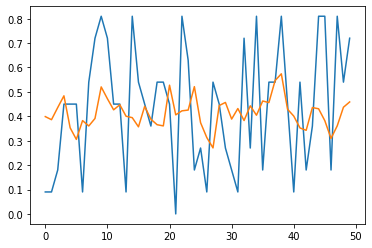

In [91]:
train_plot = [(i,j) for i,j in zip(testY[0][:50],testPredict[:50])]
plt.plot(train_plot)
plt.show()